In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
deaths = pd.read_csv("avg_deaths.csv") # 1st January to 15 December 2020
deaths

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


In [3]:
import calendar

In [4]:
deaths["num_days"] = 0

In [5]:
deaths

,Month,New_deaths,num_days
0,1,0,0
1,2,0,0
2,3,77,0
3,4,1844,0
4,5,1448,0
5,6,785,0
6,7,769,0
7,8,1020,0
8,9,739,0
9,10,751,0


In [6]:
deaths["year"] = 2020

In [7]:
deaths.columns

Index(['Month', 'New_deaths', 'num_days', 'year'], dtype='object')

In [8]:
deaths = deaths[['year','Month','num_days' ,'New_deaths', ]]

deaths

,year,Month,num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [9]:
deaths.columns = ['Year','Month','Num_days' ,'New_deaths', ]
deaths

,Year,Month,Num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [10]:
def days(year,month):
    _, num_days = calendar.monthrange(year, month)
    return num_days

In [11]:
days = (deaths[["Year", "Month"]]).apply(lambda row:days(row["Year"],row["Month"]), axis = 1)

In [12]:
deaths.Num_days = days

In [13]:
deaths.loc[11, "Num_days"]//=2

# deaths.loc[11, "Num_days"] = 15

In [14]:
deaths

,Year,Month,Num_days,New_deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [15]:
deaths["Monthly_deaths"] = deaths.Num_days.mul(deaths.New_deaths)

In [16]:
deaths.rename({"New_deaths":"Avg_deaths"}, axis = 1, inplace = True)

In [17]:
deaths["Cum_deaths"] = deaths.Monthly_deaths.cumsum()

In [18]:
deaths

,Year,Month,Num_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


In [19]:
deaths["Avg_deaths"].mean()

908.75

In [20]:
cum_cases = [deaths.loc[2,"Cum_deaths" ],deaths.loc[5,"Cum_deaths"],deaths.loc[9,"Cum_deaths" ],
            deaths.loc[11,"Cum_deaths" ]]

In [21]:
cum_cases

[2387, 126145, 227055, 297510]

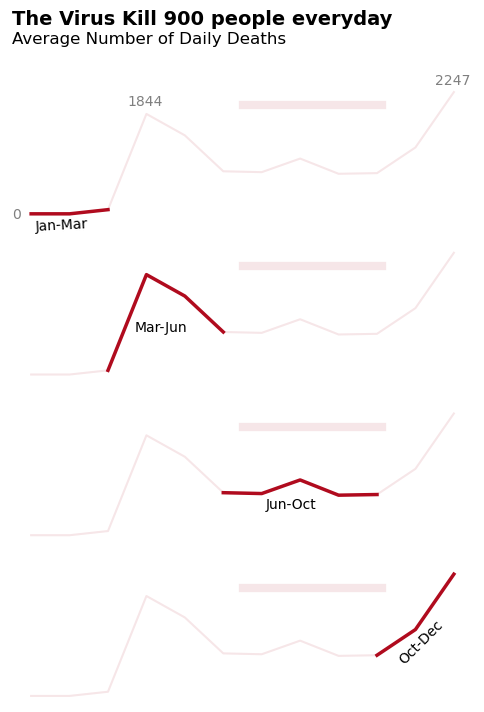

In [22]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)



ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")



ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

for ax in axes:
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)

plt.show()

In [23]:
proportions = [round(i/cum_cases[-1], 2) for i in cum_cases]
proportions

[0.01, 0.42, 0.76, 1.0]

In [24]:
proportions = []

for i in cum_cases:
    v = i/297510
    final = round(v,2)
    # print(final)
    proportions.append(final)

In [25]:
proportions

[0.01, 0.42, 0.76, 1.0]

In [26]:
xmaxs = [0.5 + i*(0.8-0.5) for i in proportions]

In [27]:
xmaxs

[0.503, 0.626, 0.728, 0.8]

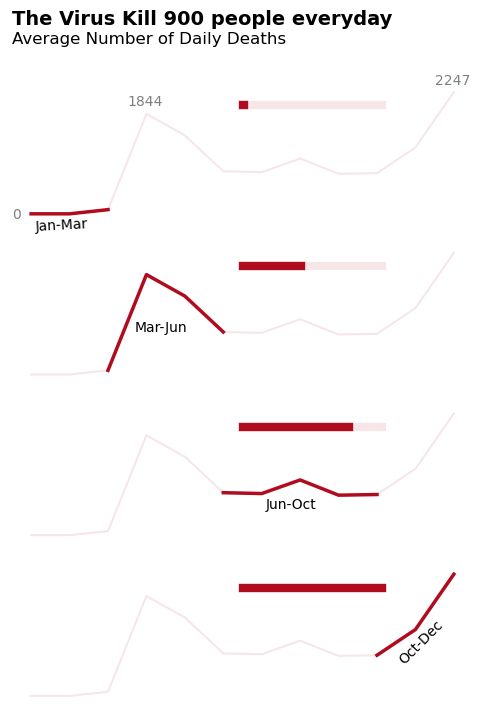

In [28]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)



ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")



ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

for ax, xmax in zip(axes, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6)

plt.show()

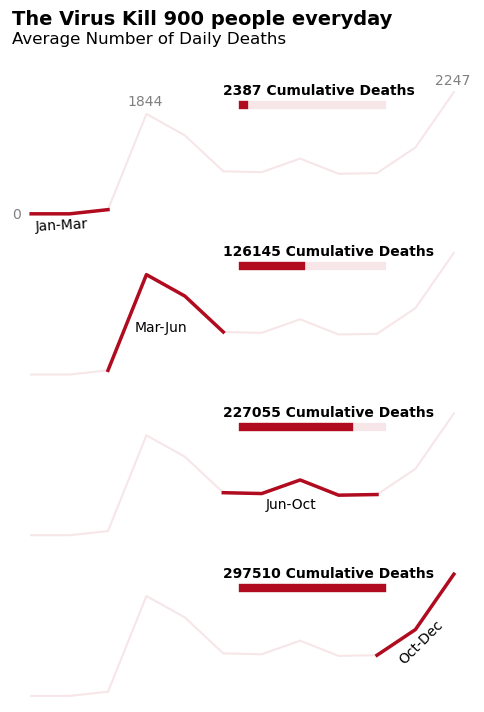

In [29]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)



ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")



ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

for ax,death, xmax in zip(axes, cum_cases, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6)
    ax.text(x = 6 , y = 2200 , s = str(death) + " Cumulative Deaths", weight = "bold",)
    

plt.show()

[ 0.  2.  4.  6.  8. 10. 12. 14.]
[-1000.     0.  1000.  2000.  3000.]


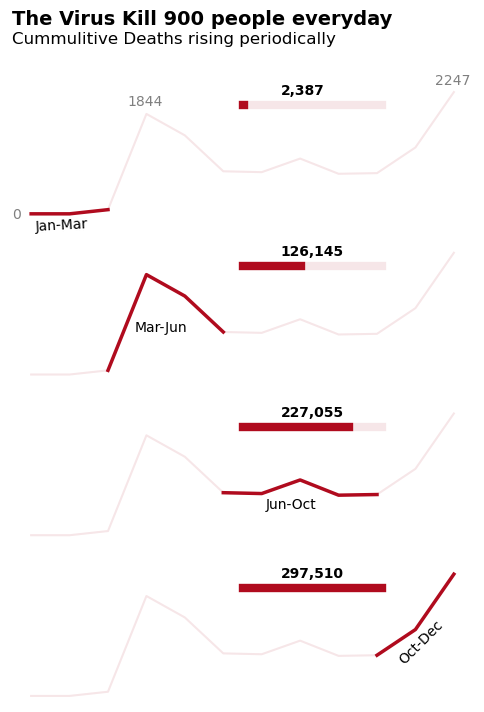

In [30]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Cummulitive Deaths rising periodically", size = 12,)



ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")



ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

for ax,death, xmax in zip(axes, cum_cases, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6)
    ax.text(x = 7.5 , y = 2200 , s = format(death, ","), weight = "bold",)

print(ax1.get_xticks())  #to check grid limits
print(ax1.get_yticks())
    

plt.show()

# Wine Quality

In [31]:
url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

In [32]:
import requests

response = requests.get(url)

In [33]:
with open("wine.zip", "wb") as f:
    f.write(response.content)

In [34]:
import zipfile

with zipfile.ZipFile("wine.zip") as zipped:
    zipped.extractall("wine")
    

In [35]:
red_wine = pd.read_csv("wine\winequality-red.csv")
white_wine = pd.read_csv("wine\winequality-white.csv")

In [36]:
red_wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [37]:
red_wine = pd.read_csv("wine\winequality-red.csv", sep = ";")
white_wine = pd.read_csv("wine\winequality-white.csv", delimiter = ";")

In [38]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
red_corr = red_wine.corr()["quality"][:-1]
red_corr

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

In [41]:
white_corr = white_wine.corr()["quality"][:-1]
white_corr

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

In [42]:
white_corr.index

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [43]:
import matplotlib.style as style

In [44]:
print(style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [45]:
style.use('ggplot')

In [46]:
style.use('default')

In [47]:
style.use('fivethirtyeight')

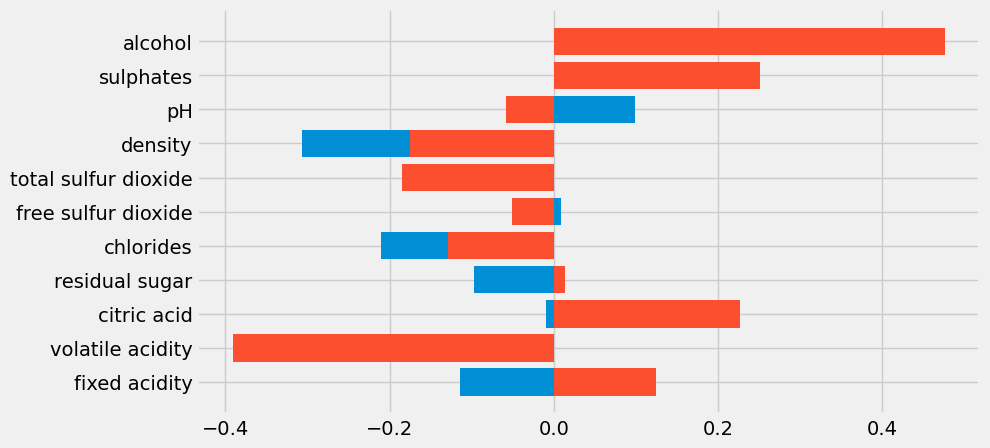

In [48]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr)
ax.barh(red_corr.index, red_corr.values)

plt.show()

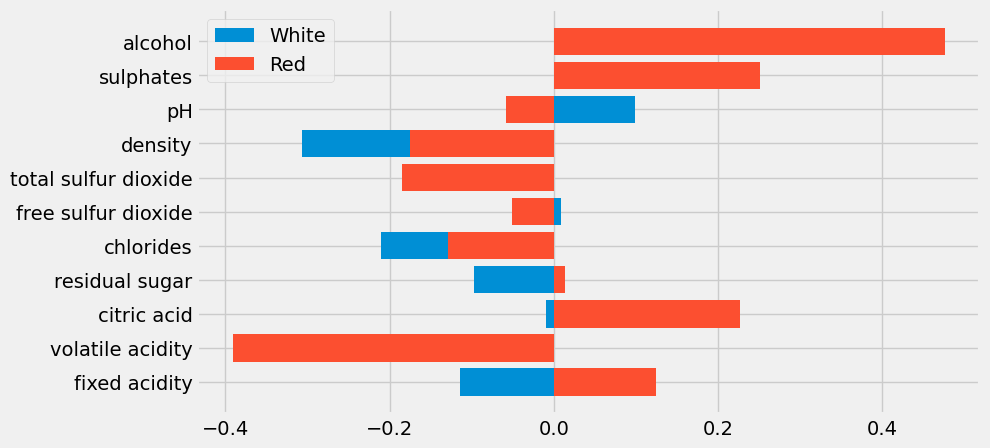

In [49]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, label = "White")
ax.barh(red_corr.index, red_corr.values, label = "Red")
plt.legend()
plt.show()

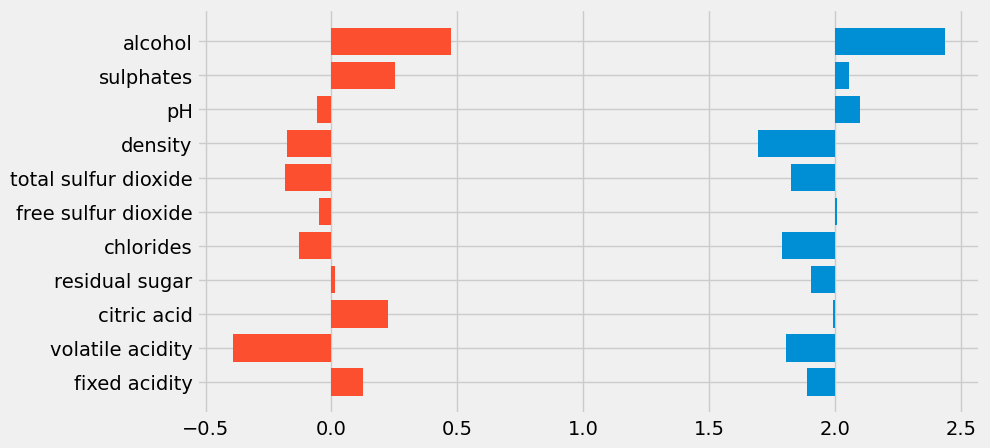

In [50]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values)
plt.show()

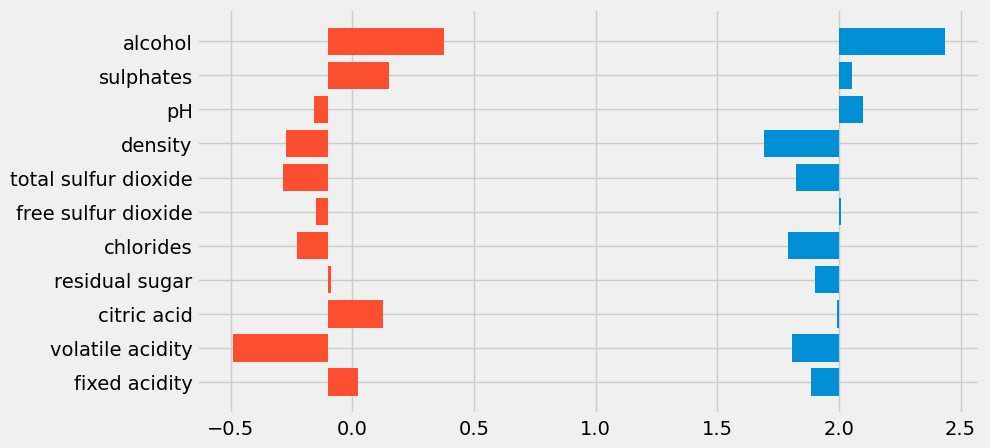

In [51]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values, left = -0.1)
plt.show()

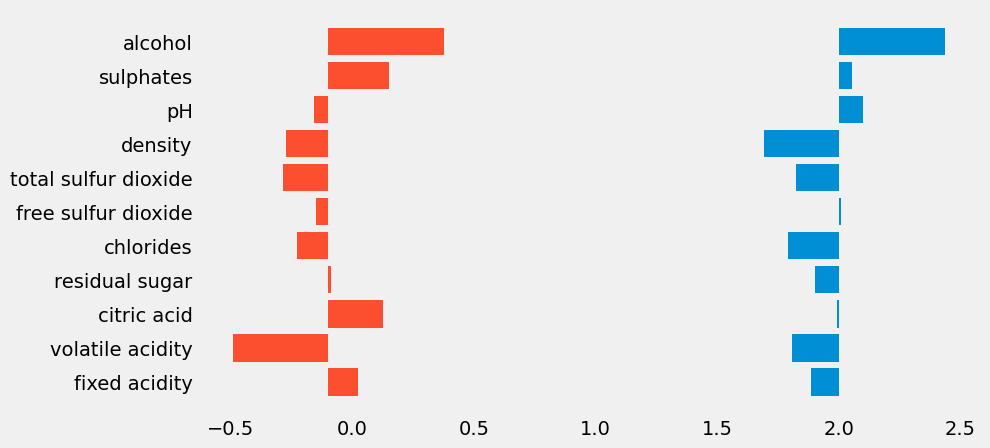

In [52]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values, left = -0.1)
ax.grid(visible = False)
plt.show()

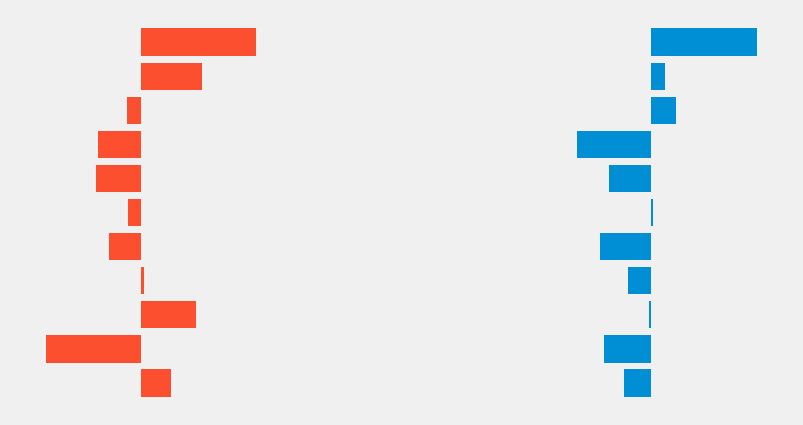

In [53]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values, left = -0.1)
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [54]:
import coord as waqas
# from coord import x_coords

In [55]:
dir(coord)

NameError: name 'coord' is not defined

In [ ]:
x_coords =  coord.x_coords
y_coord =  coord.y_coord

In [ ]:
print(x_coords)
print()
print(y_coord)

In [ ]:
white_corr.index

In [56]:
for label in x_coords:
    print(label)

NameError: name 'x_coords' is not defined

NameError: name 'coord' is not defined

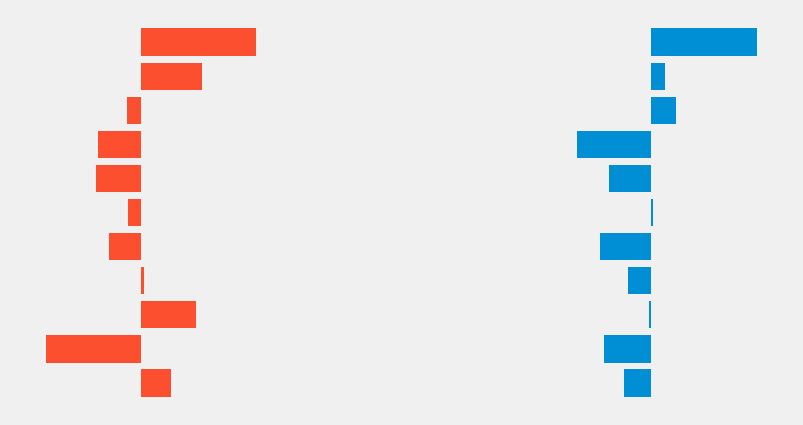

In [57]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values, left = -0.1)
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])

x_coords =  coord.x_coords
y_coord =  coord.y_coord

for label, x_coord in x_coords.items():
    ax.text(x= x_coord,y = y_coord, s = label)
    y_coord -=1
plt.show()

NameError: name 'coord' is not defined

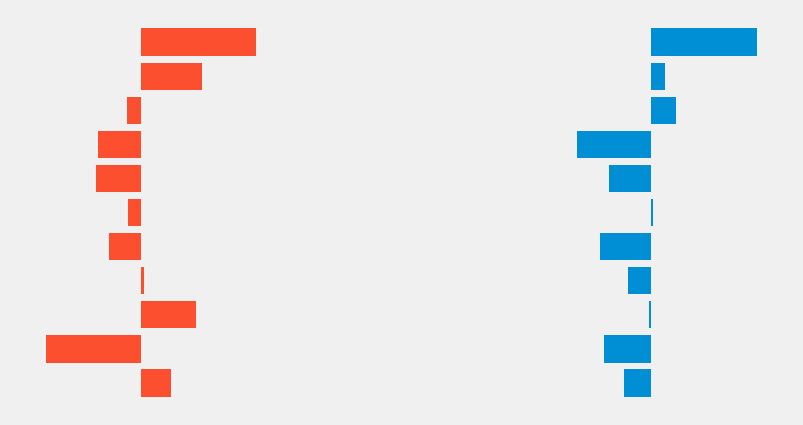

In [58]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values, left = -0.1)
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])

x_coords =  coord.x_coords
y_coord =  coord.y_coord

for label, x_coord in x_coords.items():
    ax.text(x= x_coord,y = y_coord, s = label)
    y_coord -=1
    
ax.axvline(0.5,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)
plt.show()

NameError: name 'coord' is not defined

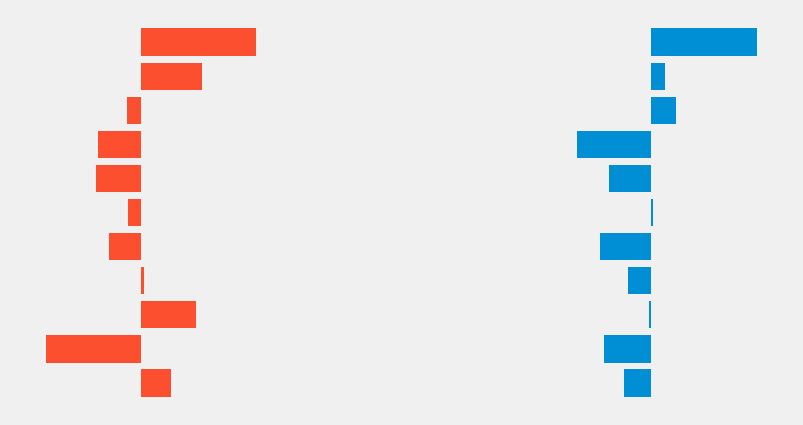

In [59]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values, left = -0.1)
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])

x_coords =  coord.x_coords
y_coord =  coord.y_coord

for label, x_coord in x_coords.items():
    ax.text(x= x_coord,y = y_coord, s = label)
    y_coord -=1
    
ax.axvline(0.5,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)
ax.axvline(1.45,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)
plt.show()

NameError: name 'coord' is not defined

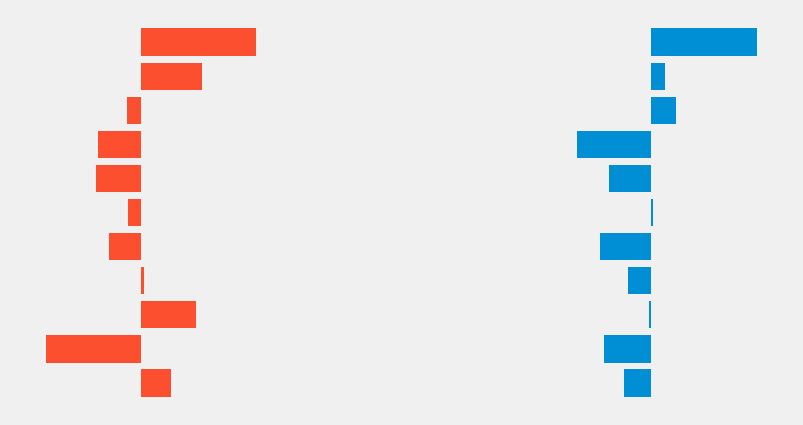

In [60]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values, left = -0.1)
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])

x_coords =  coord.x_coords
y_coord =  coord.y_coord

for label, x_coord in x_coords.items():
    ax.text(x= x_coord,y = y_coord, s = label)
    y_coord -=1
    
ax.axvline(0.5,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)
ax.axvline(1.45,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)

ax.axhline(-1, xmin = 0.01, xmax = 0.32)
ax.axhline(-1, xmin = 0.67, xmax = 0.98)


plt.show()

NameError: name 'coord' is not defined

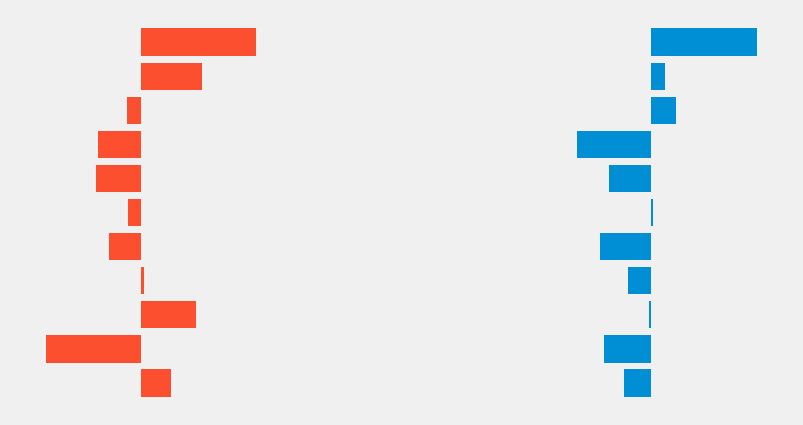

In [61]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values, left = -0.1)
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])

x_coords =  coord.x_coords
y_coord =  coord.y_coord

for label, x_coord in x_coords.items():
    ax.text(x= x_coord,y = y_coord, s = label)
    y_coord -=1
    
ax.axvline(0.5,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)
ax.axvline(1.45,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)

ax.axhline(-1, xmin = 0.01, xmax = 0.32, c = "grey", linewidth = 1, alpha = 0.5)
ax.axhline(-1, xmin = 0.67, xmax = 0.98, c = "grey", linewidth = 1, alpha = 0.5)


plt.show()

NameError: name 'coord' is not defined

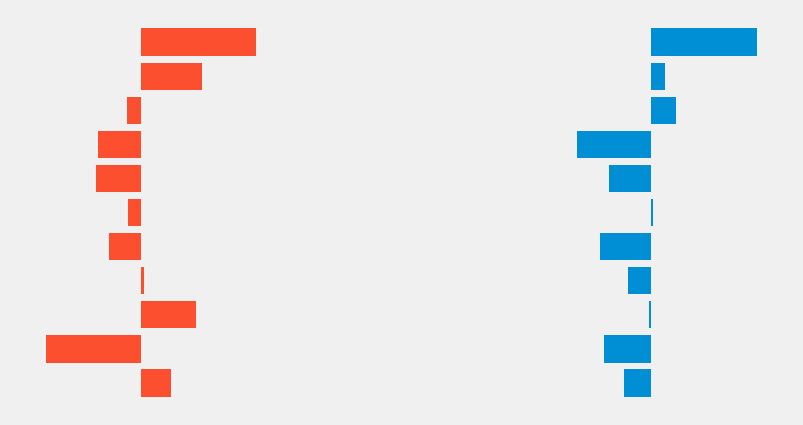

In [62]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values, left = -0.1)
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])

x_coords =  coord.x_coords
y_coord =  coord.y_coord

for label, x_coord in x_coords.items():
    ax.text(x= x_coord,y = y_coord, s = label)
    y_coord -=1
    
ax.axvline(0.5,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)
ax.axvline(1.45,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)

ax.axhline(-1, xmin = 0.01, xmax = 0.32, c = "grey", linewidth = 1, alpha = 0.5)
ax.axhline(-1, xmin = 0.67, xmax = 0.98, c = "grey", linewidth = 1, alpha = 0.5)
ax.text(x =-0.7 , y =-1.7 , s ="-0.5"+ "+0.5")

plt.show()

NameError: name 'coord' is not defined

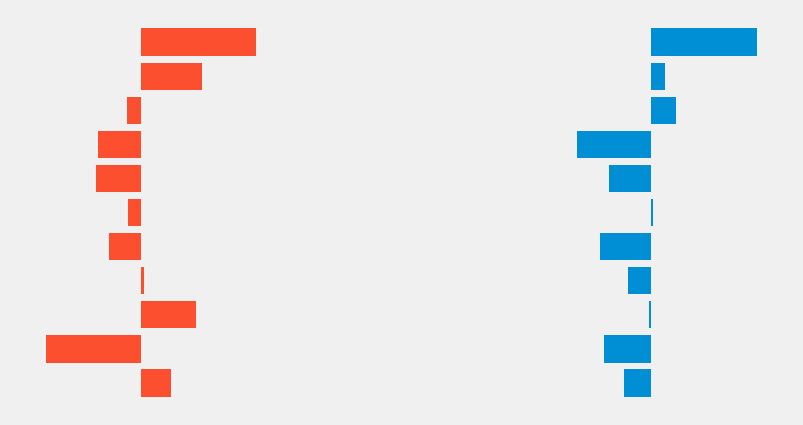

In [63]:
fig,ax = plt.subplots(figsize = (9,5))

ax.barh(white_corr.index, white_corr, left = 2)
ax.barh(red_corr.index, red_corr.values, left = -0.1)
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])

x_coords =  coord.x_coords
y_coord =  coord.y_coord

for label, x_coord in x_coords.items():
    ax.text(x= x_coord,y = y_coord, s = label)
    y_coord -=1
    
ax.axvline(0.5,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)
ax.axvline(1.45,c= "grey", alpha = 0.1, linewidth = 1, ymin = 0.1, ymax = 0.9)

ax.axhline(-1, xmin = 0.01, xmax = 0.32, c = "grey", linewidth = 1, alpha = 0.5)
ax.axhline(-1, xmin = 0.67, xmax = 0.98, c = "grey", linewidth = 1, alpha = 0.5)
ax.text(x =-0.7 , y =-1.7 , s ="-0.5"+ " "*32 + "+0.5", color = "grey", alpha = 0.5)
ax.text(x =1.43 , y =-1.7 , s ="-0.5"+ " "*32 + "+0.5", color = "grey", alpha = 0.5)

plt.show()